## Full MNIST dataset for digit image classification
Simple approach using high-level fast.ai

In [14]:
from fastai.vision.all import *

## Load training and validation data

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
train_path = path/'training'
fnames = get_image_files(train_path)
dls = ImageDataLoaders.from_path_func(train_path, fnames, parent_label)

In [4]:
dls.vocab, len(dls.vocab)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10)

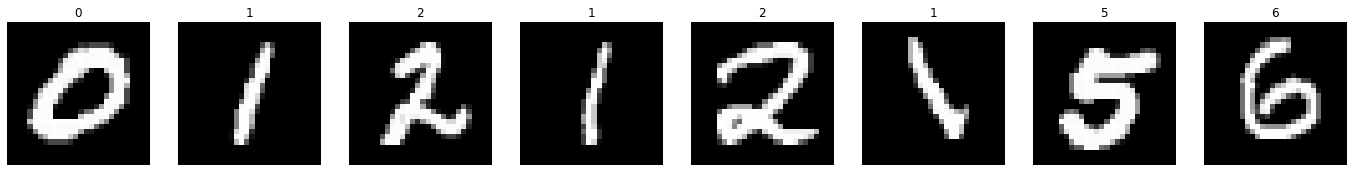

In [5]:
dls.show_batch(max_n=8, nrows=1)

### Prepare test data

In [6]:
a5 = PILImage.create((path/'testing'/'5').ls()[0])
a5

In [7]:
a7 = PILImage.create((path/'testing'/'7').ls()[0])
a7

In [8]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)
learn.fit_one_cycle(4, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.192161,0.880477,0.937333,00:32
1,0.839420,0.656620,0.935333,00:31
2,0.174895,3.906272,0.985250,00:30
3,0.036238,0.036932,0.990417,00:31


In [9]:
learn.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

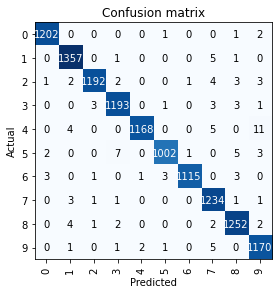

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
res = learn.predict(a5)
res

('5',
 tensor(5),
 tensor([4.1055e-08, 3.7147e-07, 8.6026e-08, 5.9420e-07, 3.0277e-08, 9.9996e-01,
         5.2468e-07, 4.8572e-07, 4.4887e-06, 3.1204e-05]))

In [12]:
res = learn.predict(a7)
res

('7',
 tensor(7),
 tensor([7.9098e-10, 2.1487e-08, 1.4169e-07, 2.1689e-07, 4.7594e-07, 5.0203e-09,
         4.4790e-12, 1.0000e+00, 4.9372e-09, 1.8395e-06]))

In [13]:
learn.export()

Use [classify.py](classify.py) to use the exported model.